# Titanic passengers's dataset analysis

## Made by : MAYENE Bienvenue Schékina

### 15 Novembre 2023

Dans ce cas d'étude nous travaillerons avec la base de données appelée **titanic**. Notre objectif sera de realiser des analyses sur cette base, construire un model de machine learning dans le but de prédire la survie des passagers du bateau et enfin étudier d'éventuels clusters des passagers.

## Plan d'étude

**1-) *Inspection* et *nettoyage* du jeu de données**

**2-) Réaliser des analyses univariées et bivariées**

**3-) Construire, évaluer et tester un modèle de classification**

**4-)Construire un modèle non supervisé**

In [99]:
# chargment des libraries

import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm



In [2]:
# importation de l'autre partie du dataset

titanic_train = pd.read_csv("train.csv", 
                       delimiter = ',',
                       header = 0)
# dimension
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


La base de données avec laquelle nous travaillerons est appelée **titanic**. Elle contient des informations relatives aux passagers du bateau du même nom

# 1-) Inspection et nettoyage

In [ ]:
titanic_train.columns.tolist()

## Dictionnaire des variables 

**Pclass** :  Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

**survival** : Survival (0 = No; 1 = Yes)

**name** : Name

**sex** : Sex

**age** : Age

**sibsp** : Number of Siblings/Spouses Aboard (Nombre de frères et sœurs/conjoints à bord)

**parch** : Number of Parents/Children Aboard

**ticket** : Ticket Number

**fare** : Passenger Fare (British pound)

**cabin** : Cabin

**embarked** : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# Dimension de la base

titanic_train.shape

(891, 12)

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**1-) Gestion des valeurs manquantes**

Nous constatons que nous avons des valeurs manquantes dans notre jeu de données.

>- La variable *cabin* possède seulement 204 enregistrements sur 891. Etant donné le nombre élevé de valeurs manquantes, nous décidons de supprimer cette variable pour le reste de notre étude.

>- Pour la variable *Embarked*, nous décidons de rempacer les valeurs manquantes par le mode de la variable

>- Pour la variable *age*, nous dédons d'impputer les valeurs manquantes de cette variable à l'aide de l'algorithme des K-Nearest Neighbours

In [5]:
# supression de la variable cabin

titanic_train.drop(columns = "Cabin", inplace = True)

In [6]:
# Remplacement des valeurs manquantes de la variable Embarked par le mode

titanic_train["Embarked"] = titanic_train["Embarked"].astype("category") #transformation du type de la variable pour effectuer l'imputation

mode_ = titanic_train["Embarked"].mode().iloc[0]


titanic_train["Embarked"].fillna(mode_, inplace = True)

 

In [7]:
# Remplacement des valeurs manquantes de la variable "age" 

imputer = KNNImputer(n_neighbors = 3) # choix du nombre de voisin

# Remodeler la colonne "Age" pour la rendre 2D
age_2d = titanic_train["Age"].values.reshape(-1, 1)


titanic_train["Age"] = imputer.fit_transform(age_2d) # ajustement des données aux données existentes

In [8]:
# Verification

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 70.7+ KB


**2-) Recodage des variables catégorielles**

In [9]:
titanic_train.loc[titanic_train["Sex"] == "male", "Sex"] = 1
titanic_train.loc[titanic_train["Sex"] == "female", "Sex"] = 0

In [10]:
titanic_train["Embarked"] = titanic_train["Embarked"].astype("object")

titanic_train.loc[titanic_train["Embarked"] == "C", "Embarked"] = 0
titanic_train.loc[titanic_train["Embarked"] == "Q", "Embarked"] = 1
titanic_train.loc[titanic_train["Embarked"] == "S", "Embarked"] = 2


**Résumé des changements éffectués sur les variables catégorielles** 

>- **Variable Sex:** 

1 : Homme
0 : Femme

>- **Variable Embarked** 

0 : Cherbourg

1 : Queenstown

2 : Southampton

**3-) Changement du type des variables du jeu de données**

In [12]:
# Transformation des variables catégorielles

variables_cat = ['Survived','Pclass','Sex', 'Embarked']

for i in variables_cat :
    titanic_train[i] = titanic_train[i].astype('category')

In [13]:
# Transformation de la variable age en type "int64"

titanic_train['Age'] = titanic_train['Age'].astype('int64')

In [14]:
# Visualisation de toutes les transformtions effectuées
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,0


# 2-) Analyses statistiques

## 2-1/ Analyses univariées

**Variables catégorielles :**

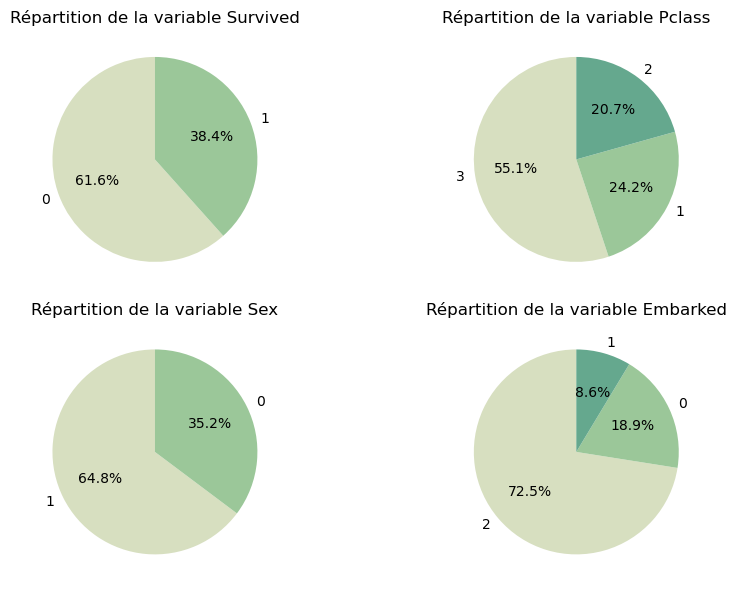

In [59]:
# diagramme circulaire des variables catégorielles d'une base de données

fig, axes = plt.subplots(2,2, figsize = (10,6))

# Aplatir le tableau d'axes
axes = axes.flatten()

for i, var in enumerate(variables_cat) :
    counts = titanic_train[var].value_counts()
    axes[i].pie(counts, labels = counts.index, autopct = "%1.1f%%", startangle = 90, colors = sns.cubehelix_palette(start=.5, rot=-.75))
    axes[i].set_title(f"Répartition de la variable {var}")

    # Ajustements de la mise en page pour éviter les chevauchements
plt.tight_layout()
plt.show()

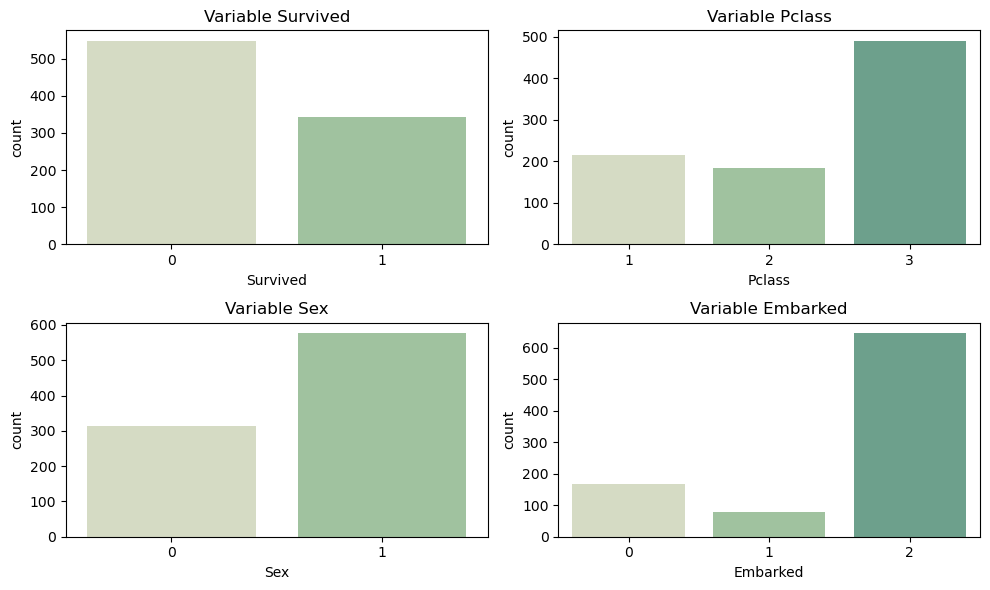

In [80]:
# Diagramme en barre des variables catégorielles de notre base de données

fig, axes = plt.subplots(2,2, figsize = (10,6))

axes = axes.flatten()

for i, var in enumerate(variables_cat) :
    counts = titanic_train[var].value_counts()
    sns.barplot(x = counts.index, y = counts, ax = axes[i], palette = sns.cubehelix_palette(start=.5, rot=-.75))
    axes[i].set_title(f"Variable {var}")
    
plt.tight_layout()

plt.show()

**Commentaires :**

D'après les résultats obtenues ci-dessus, nous constatons que :

>- **61,6%** des ndividus de notre base ont survecu au nauffrage du bâteau
>- Un peu plus de la moitié des passagers voyageaient en 3ième classe
>- Les passagers sont composés majoritairement des hommes
>- **72,5%** de ces passagers ont embarqué sur la bâteau au port de Southampton

**Variables quantitatives**

In [67]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [70]:
#Définissons nos variables quantitatives

variables_quant = ['Age', 'SibSp','Parch', 'Fare']

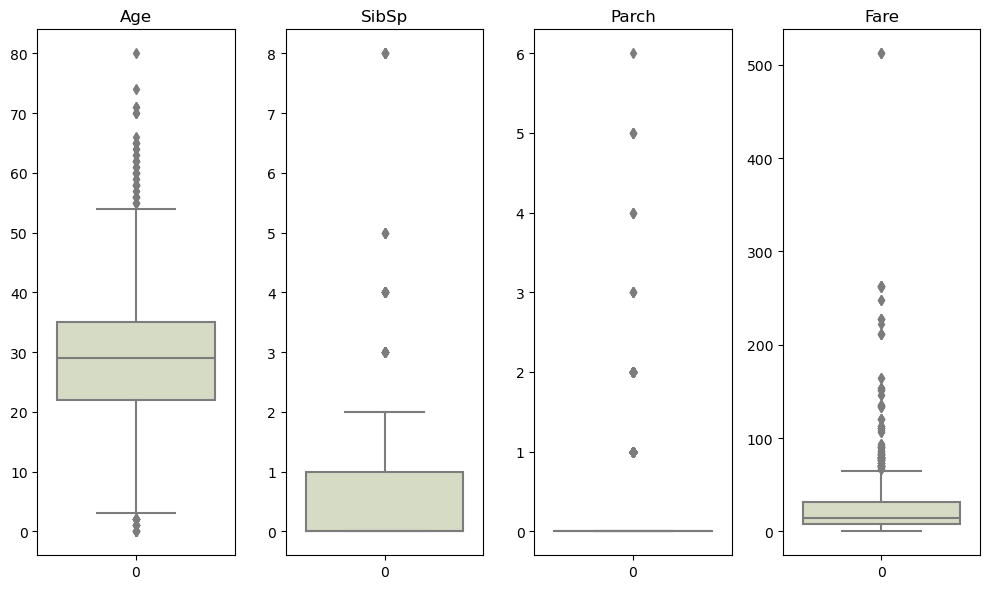

In [78]:
# Boîtes à moustache

fig, axes = plt.subplots(1,4 , figsize = (10,6))

axes = axes.flatten()

for i, var in enumerate(variables_quant) :
    sns.boxplot(titanic_train[var], ax = axes[i] , palette = sns.cubehelix_palette(start=.5, rot=-.75))
    axes[i].set_title(f"{var}")
    
plt.tight_layout()
plt.show()

In [74]:
titanic_train.loc[:, variables_quant].describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.544332,0.523008,0.381594,32.204208
std,13.013778,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Commentaires :**

Nous constatons que pour chacune de nos variables quantitatives, nous avons des valeurs extrêmes

>- En moyenne les passagers de notre jeux de données sont âgés de **29 ans**
>- 50% de ces passagers n'avaient pas de frères et soeurs (ou conjoint), ni d'enfants (ou parents) à l'interieur du bâteau 
>- 50% de ces passagers ont déboursé moins de 14.45 Livres pour acceder au bâteau


## 2.2/ Analyses bivariées

**Variables quantitatives ~ Variables quantitatives**

Pour analyser les variables quantitatives entre elles, nous pouvons utiliser une Nuage de points (Scatterplot), ou encore une matrice de corrélation afin d'observer la liaison entre les variables

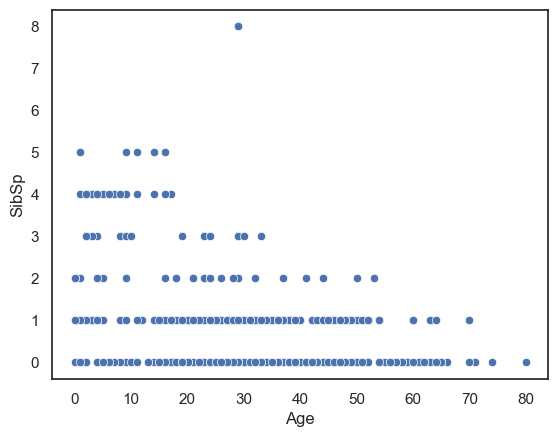

In [94]:
# Changer le thème
sns.set_theme(style="white") 
sns.scatterplot(x = titanic_train["Age"], y = titanic_train["SibSp"])
plt.show()

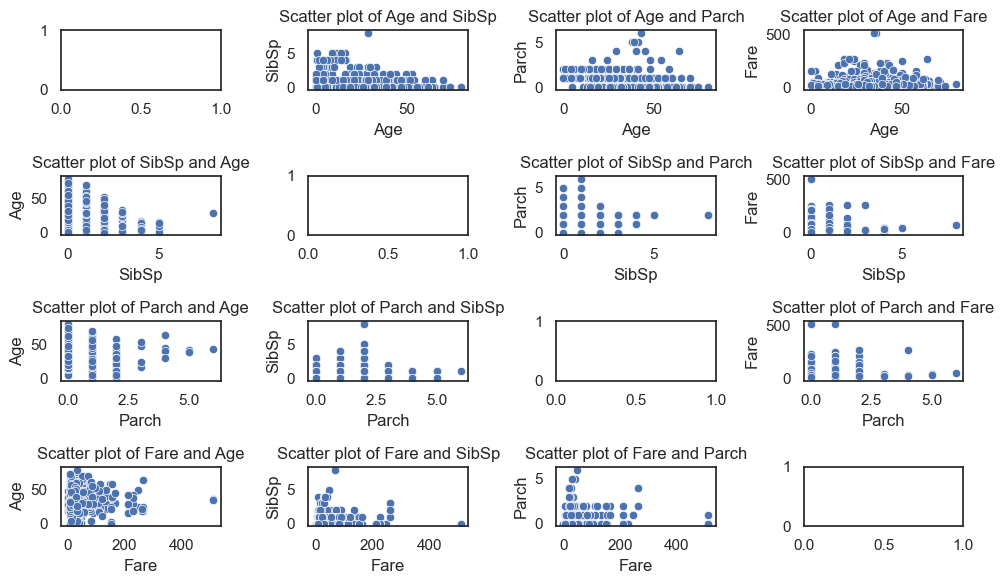

In [93]:
fig, axes = plt.subplots(4,4, figsize = (10,6))

axes = axes.flatten()

for i,var1 in enumerate(variables_quant) :
    for j,var2 in enumerate(variables_quant) :
        if i !=j :
            sns.scatterplot(x = titanic_train[var1], y = titanic_train[var2], ax = axes[i*4+j])
            axes[i*4+j].set_title(f"Scatter plot of {var1} and {var2}")
            
             
        
plt.tight_layout()
plt.show()

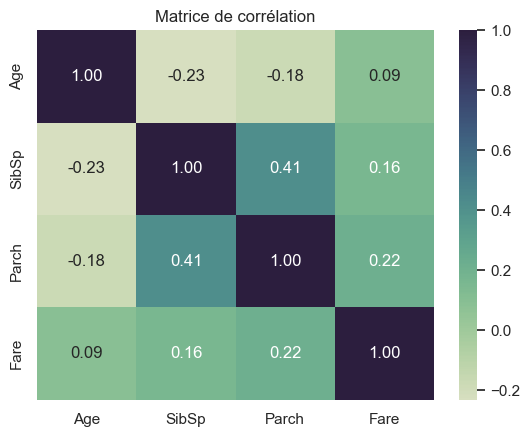

In [95]:
# Matrice de corrélation

matrix = titanic_train.loc[:, variables_quant].corr()

sns.heatmap(matrix, annot = True, cmap = sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), fmt = ".2f" )

plt.title("Matrice de corrélation")
plt.show()

Nous constatons qu'il n'existe que des faibles liaisons entre nos variables quantitatives. 

Nous pouvons quand même relever les informations suivantes :

>- Les passagers les plus âgés ont tendance à être ceux ayant le moins de frère et soeurs à bord du bâteau
>- 

**Variables catégorielles ~ variable cible**

Pour ce type de variable, nous procéderons à un **test de Khi-deux** afin de mesurer l'indépendance entre nos variables catégorielles.

Les hypothèses du test sont les suivantes : 

**H0 : Les variables sont indépendantes** VS **H1 : Les variables sont dépendantes**

Si la p-value associée à ce test est inférieur au seuil de 0.05, nous rejetterons l'hypothèse nulle

In [113]:
# P_value et coef de Cramer

resultats = pd.DataFrame(columns = ["Nom_Var","Statistic_test", "P_value", "V_Cramer"])

for i in variables_cat:
    if i != "Survived" :
        contingency_table = pd.crosstab(titanic_train[i], titanic_train["Survived"])
        Statistic_test, P_value,_,_ = chi2_contingency(contingency_table)
            #calcul du V de cramer
        n = len(titanic_train)
        m = min(contingency_table.shape)-1
        V_cramer = np.sqrt(Statistic_test / (n*m))
                # Ajout des résultats dans le dataframe
        resultats.loc[len(resultats)] = [i , Statistic_test, P_value, V_cramer]
    
# Affichage 
resultats

,Nom_Var,Statistic_test,P_value,V_Cramer
0,Pclass,102.888989,4.549252e-23,0.339817
1,Sex,260.717020,1.197357e-58,0.540936
2,Embarked,25.964453,2.300863e-06,0.170707


**Commentaires :** 

Nous constatons que les p-values de toutes nos variables catégorielles sont inférieures au seuil de 5%. Nous rejettons alors les hypothèses nulles d'indépendance entre nos variables et notre variable cible "*Survived*"

Notons toutefois que ces liaisons ne sont pas très intenses.

La variable *Sex* est la variable ayant la plus forte liaison avec notre variable cible; En effet nous pouvons voir V_Cramer =**0,54**

**Variables quantitatives ~ Variable cible**

In [118]:
variables_quant

['Age', 'SibSp', 'Parch', 'Fare']

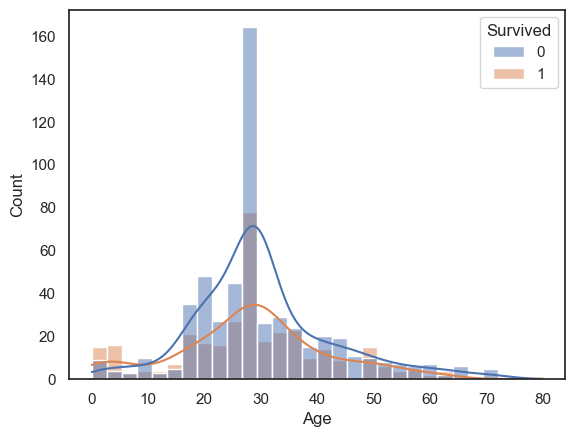

In [122]:
sns.histplot(x= titanic_train["Age"], hue = titanic_train["Survived"], kde = True)
plt.show()

C:\Users\mayen\AppData\Local\Temp\ipykernel_24840\3226327171.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(x = titanic_train[var], bins = 10, kde = True, hue = titanic_train["Survived"], ax = axes[i],
C:\Users\mayen\AppData\Local\Temp\ipykernel_24840\3226327171.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(x = titanic_train[var], bins = 10, kde = True, hue = titanic_train["Survived"], ax = axes[i],
C:\Users\mayen\AppData\Local\Temp\ipykernel_24840\3226327171.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(x = titanic_train[var], bins = 10, kde = True, hue = titanic_train["Survived"], ax = axes[i],
C:\Users\mayen\AppData\Local\Temp\ipykernel_24840\3226327171.py:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(x = titanic_tr

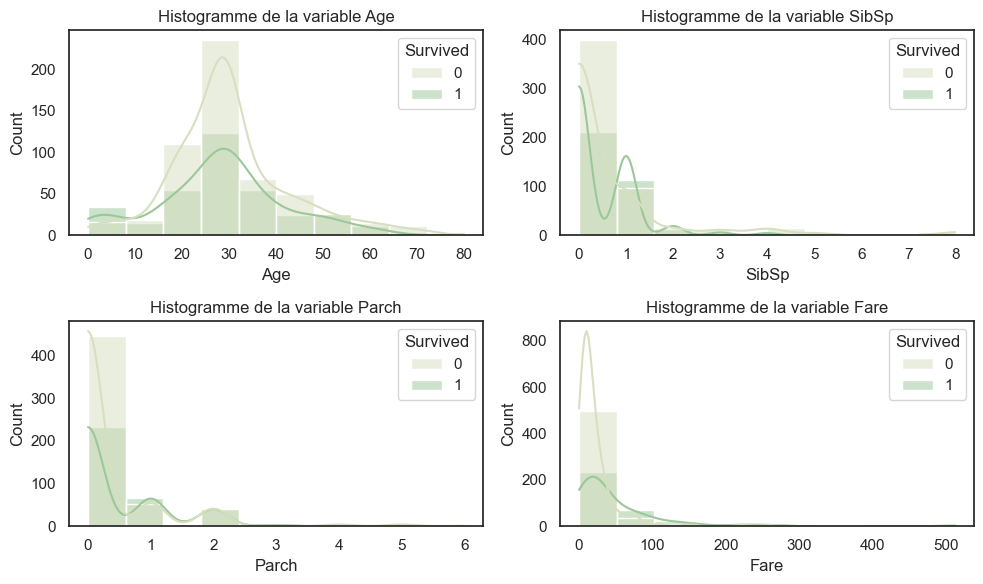

In [130]:
fig, axes = plt.subplots(2,2, figsize= (10,6))

axes = axes.flatten()

for i, var in enumerate(variables_quant):
    sns.histplot(x = titanic_train[var], bins = 10, kde = True, hue = titanic_train["Survived"], ax = axes[i], 
                 palette =sns.cubehelix_palette(start=.5, rot=-.75)  )
    axes[i].set_title(f"Histogramme de la variable {var}")
plt.tight_layout()
plt.show()

Nous allons tester s'il existe des différences significatives entre les passagers qui ont survecu et ceux n'ayant pas survecu selon nos différentes variables quantitatives. Pour cela , nous utiliserons un test de student qui compare la moyenne entre 2 groupes

Avant tout nous allons verifier si les distributions de nos variables quantitatives sont normales ou non

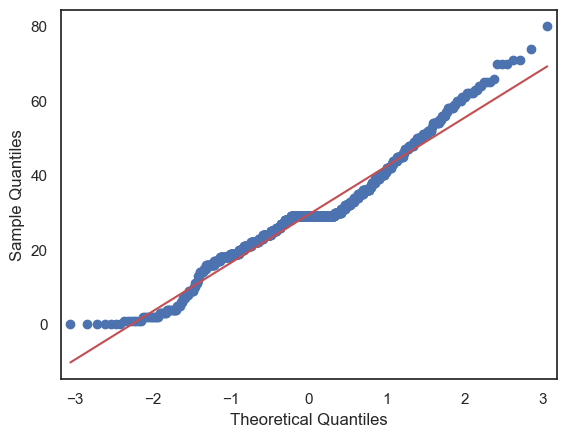

In [135]:
import statsmodels.api as sm

# Exemple avec l'âge
sm.qqplot(titanic_train['Age'], line='s')
plt.show()

Le test de Shapiro-Wilk est un test statistique qui évalue si un échantillon de données suit une distribution normale ou non. Les hypothèses du test de Shapiro-Wilk sont les suivantes :

**H0: Les données suivent une distribution normale**  VS **H1: Les données ne suivent pas une distribution normale.**

In [138]:
# test de shapiro-Wilk

from scipy.stats import shapiro

# Exemple avec l'âge
stat, p_value = shapiro(titanic_train['Fare'])
print(f"Statistique de test : {stat}, P-value : {p_value}")

Statistique de test : 0.5218917727470398, P-value : 1.0789998175301091e-43


In [139]:
from scipy.stats import jarque_bera

# Exemple avec l'âge
stat, p_value = jarque_bera(titanic_train['Age'].dropna())
print(f"Statistique de test : {stat}, P-value : {p_value}")


Statistique de test : 66.50096867059177, P-value : 3.6265872683970135e-15


In [141]:
# test d'Agostinon Pearson

from scipy.stats import normaltest

# Exemple avec l'âge
stat, p_value = normaltest(titanic_train['Fare'].dropna())
print(f"Statistique de test : {stat}, P-value : {p_value}")

Statistique de test : 904.5872705326926, P-value : 3.727091062842147e-197
